In [43]:
import pandas as pd

In [44]:
from google.colab import drive

In [45]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/auto-mpg_new.csv', header=None)

In [46]:
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
              'acceleration', 'model_year', 'origin', 'car_name']
#print(df)

In [47]:
# 미션 1: 데이터 전처리 및 결측치 처리하기

# 1. horsepower 열의 결측치가 있는지 확인하고, 결측치를 horsepower의 중앙값(median)으로 대체하세요

# 컬럼 타입 확인. obeject -> 숫자가 아닌 값이 있음
print(df['horsepower'].dtype)

#  문자열로 된 데이터를 숫자형으로 안전하게 변환
df['horsepower'] = pd.to_numeric(df['horsepower'],errors='coerce')
print(df['horsepower'].dtype)

# 열의 결측치 확인
df['horsepower'].isnull().sum()

# 결측치를 horsepower의 중앙값으로 대체
horsepower_median = df['horsepower'].median()
df['horsepower'].fillna(horsepower_median,inplace=True)
print(df)

# 2. car_name 열을 제거하고 새로운 DataFrame을 만드세요.
new_df = df.drop('car_name',axis=1,inplace=True)
print(new_df)

object
float64
      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     model_year  origin                   car_name  
0            70       1  chevrolet chevelle malibu  
1            7

<ipython-input-47-3348070550>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(horsepower_median,inplace=True)


In [48]:
# 미션 2: 조건부 데이터 필터링 및 새로운 열 생성

# 연비(mpg)가 30 이상인 차량만 필터링하여 high_mpg라는 새로운 DataFrame을 생성하세요
high_mpg = df['mpg'] >= 30
df['mpg']

# high_mpg 데이터에 무게(weight) 대비 마력(horsepower)의 비율을 나타내는 hp_weight_ratio라는 새로운 열을 추가하세요.
df['hp_weight_ratio'] = df['horsepower'] / df['weight']
df['hp_weight_ratio']
print(df)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     model_year  origin  hp_weight_ratio  
0            70       1         0.037100  
1            70       1         0.044679  
2     

In [49]:
# 미션 3: 그룹화 및 통계 분석 심화

# cylinders와 origin을 기준으로 그룹화하여, 그룹별로 다음을 계산하세요.
group = df.groupby(['cylinders', 'origin'])
#print(group)

# 1. 연비(mpg)의 평균값과 표준편차
group_average = df.groupby(['cylinders', 'origin'])['mpg'].mean()
#print(group_average)
group_std = df.groupby(['cylinders', 'origin'])['mpg'].std()
#print(group_std)

# 2. 마력(horsepower)의 최대값과 최소값
horsepower_max = df.groupby(['cylinders', 'origin']).max()
#print(horsepower_max)
horsepower_min = df.groupby(['cylinders', 'origin']).min()
print(horsepower_min)

                   mpg  displacement  horsepower  weight  acceleration  \
cylinders origin                                                         
3         3       18.0          70.0        90.0  2124.0          12.5   
4         1       19.0          85.0        52.0  1800.0          11.6   
          2       18.0          68.0        46.0  1825.0          12.2   
          3       20.0          71.0        52.0  1613.0          13.5   
5         2       20.3         121.0        67.0  2830.0          15.9   
6         1       15.0         155.0        72.0  2472.0          11.3   
          2       16.2         145.0        76.0  3140.0          13.6   
          3       19.0         146.0        97.0  2807.0          11.4   
8         1        9.0         260.0        90.0  3086.0           8.0   

                  model_year  hp_weight_ratio  
cylinders origin                               
3         3               72         0.040441  
4         1               71         0.02

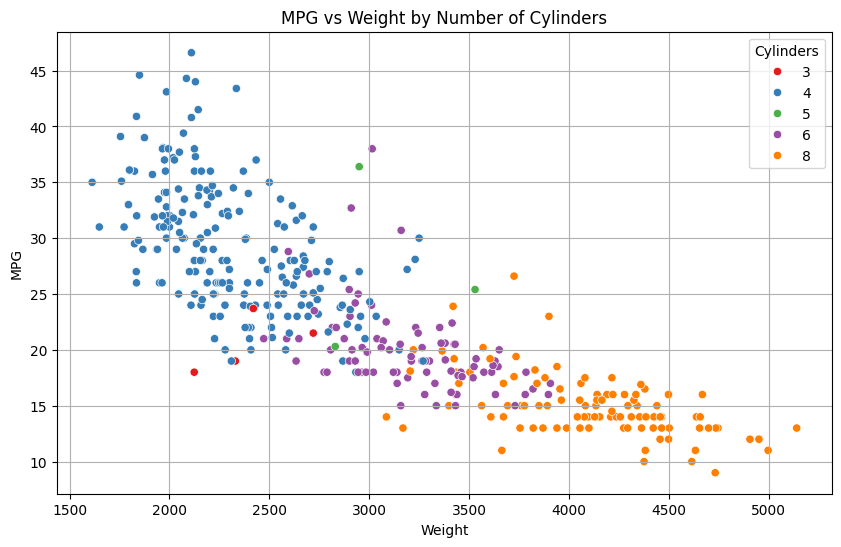

<Axes: title={'center': 'model_year'}, xlabel='mpg'>

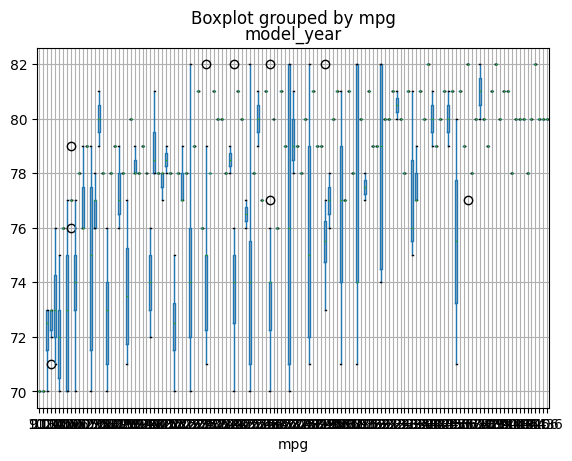

In [50]:
# 미션 4: 데이터 시각화 심화 실습

# 1. `mpg`(연비)와 `weight`(무게)의 관계를 실린더(`cylinders`) 수에 따라 다른 색상으로 나타내는 산점도를 그리세요.
import seaborn as sns
import matplotlib.pyplot as plt

# 산점도 시각화
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='weight',y='mpg',hue='cylinders',palette='Set1')

# 그래프 제목 및 라벨
plt.title("MPG vs Weight by Number of Cylinders")
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.legend(title="Cylinders")
plt.grid(True)
plt.show()

# 2. `model_year`에 따른 연비(`mpg`)의 변화를 박스플롯으로 시각화하세요.
df.boxplot(column='model_year', by='mpg',grid=True)

                      mpg  cylinders  displacement  horsepower    weight  \
mpg              1.000000  -0.775396     -0.804203   -0.773453 -0.831741   
cylinders       -0.775396   1.000000      0.950721    0.841284  0.896017   
displacement    -0.804203   0.950721      1.000000    0.895778  0.932824   
horsepower      -0.773453   0.841284      0.895778    1.000000  0.862442   
weight          -0.831741   0.896017      0.932824    0.862442  1.000000   
acceleration     0.420289  -0.505419     -0.543684   -0.686590 -0.417457   
model_year       0.579267  -0.348746     -0.370164   -0.413733 -0.306564   
origin           0.563450  -0.562543     -0.609409   -0.452096 -0.581024   
hp_weight_ratio -0.243536   0.246211      0.283185    0.599162  0.130381   

                 acceleration  model_year    origin  hp_weight_ratio  
mpg                  0.420289    0.579267  0.563450        -0.243536  
cylinders           -0.505419   -0.348746 -0.562543         0.246211  
displacement        -0.543

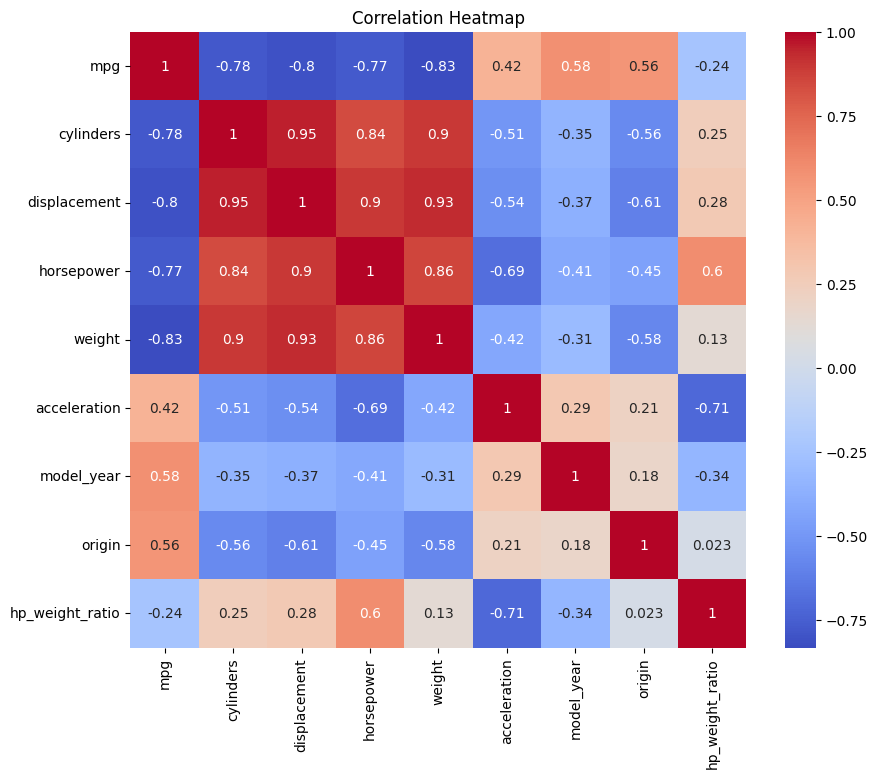

가장 강한 상관관계를 갖는 변수 쌍: ('displacement', 'cylinders')


In [51]:
# 미션 5: 상관 분석 및 히트맵 시각화

# 1. 데이터의 모든 수치형 열 간 상관계수 매트릭스를 구하세요.
correlation_matrix = df.corr()
print(correlation_matrix)

# 2. Seaborn을 활용하여 상관계수 히트맵(heatmap)을 시각화하고,
# heatmap(히트맵) 은 데이터를 행렬(2차원 표) 형태로 보여주되,값의 크기를 색상으로 표현해서 숫자 간의 차이나 패턴을 한눈에 볼 수 있게 해주는 시각화 도구입니다.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8)) # 가로 10인치, 세로 8인치의 크기
# annot=True: 각 셀의 실제 상관계수 숫자 표시
# cmpa: color map
# square: 셀을 정사각형으로 만들어 정렬
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm",square=True)
plt.title("Correlation Heatmap")
plt.show()

# 가장 강한 상관관계(절댓값 기준)를 갖는 두 변수의 이름을 적으세요.
import numpy as np # 수치 계산을 하기 위해
correlation_matrix = df.corr()
corr_abs = correlation_matrix.abs() # 절댓값 추출
np.fill_diagonal(corr_abs.values, np.nan)
max_pair = corr_abs.unstack().sort_values(ascending=False).dropna().index[0]
print("가장 강한 상관관계를 갖는 변수 쌍:", max_pair)